In [1]:
import pandas as pd
df = pd.read_csv('unprocessed_feeds.csv')
df

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2022-03-03T19:30:44+05:30,1,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-03T19:31:44+05:30,2,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-03T19:32:44+05:30,3,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-03T19:33:44+05:30,4,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-03T19:34:44+05:30,5,23.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
38790,2022-04-11T17:55:56+05:30,38791,NaN,NaN,34.0,31.0,97921.95\r\n\r\n,NaN,NaN,NaN,NaN
38791,2022-04-11T17:56:56+05:30,38792,NaN,NaN,34.0,31.0,97923.89\r\n\r\n,NaN,NaN,NaN,NaN
38792,2022-04-11T17:57:56+05:30,38793,NaN,NaN,34.0,29.0,97923.77\r\n\r\n,NaN,NaN,NaN,NaN
38793,2022-04-11T17:58:56+05:30,38794,NaN,NaN,34.0,29.0,97919.67\r\n\r\n,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38795 entries, 0 to 38794
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  38795 non-null  object 
 1   entry_id    38795 non-null  int64  
 2   field1      10585 non-null  float64
 3   field2      10585 non-null  float64
 4   field3      28208 non-null  float64
 5   field4      28208 non-null  float64
 6   field5      28208 non-null  object 
 7   latitude    0 non-null      float64
 8   longitude   0 non-null      float64
 9   elevation   0 non-null      float64
 10  status      0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 3.3+ MB


In [3]:
df['temp'] = df['field1'].fillna(df['field3'])
df['hum'] = df['field2'].fillna(df['field4'])

In [4]:
df = df[['created_at','temp','hum']]

In [5]:
len(df[df['temp']==df['temp'].min()])

35

In [6]:
df['temp'] = df['temp'].replace(0,df['temp'].mean())
df['hum'] = df['hum'].replace(0,df['hum'].mean())

C:\Users\yennu\AppData\Local\Temp\ipykernel_24348\2106165837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['temp'].replace(0,df['temp'].mean())
C:\Users\yennu\AppData\Local\Temp\ipykernel_24348\2106165837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hum'] = df['hum'].replace(0,df['hum'].mean())


In [7]:
df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])

C:\Users\yennu\AppData\Local\Temp\ipykernel_24348\523573561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])


In [8]:
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\yennu\AppData\Local\Temp\ipykernel_24348\329245698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])


In [9]:
df['created_at']

0       2022-03-03 19:30:44
1       2022-03-03 19:31:44
2       2022-03-03 19:32:44
3       2022-03-03 19:33:44
4       2022-03-03 19:34:44
                ...        
38790   2022-04-11 17:55:56
38791   2022-04-11 17:56:56
38792   2022-04-11 17:57:56
38793   2022-04-11 17:58:56
38794   2022-04-11 17:59:55
Name: created_at, Length: 38795, dtype: datetime64[ns]

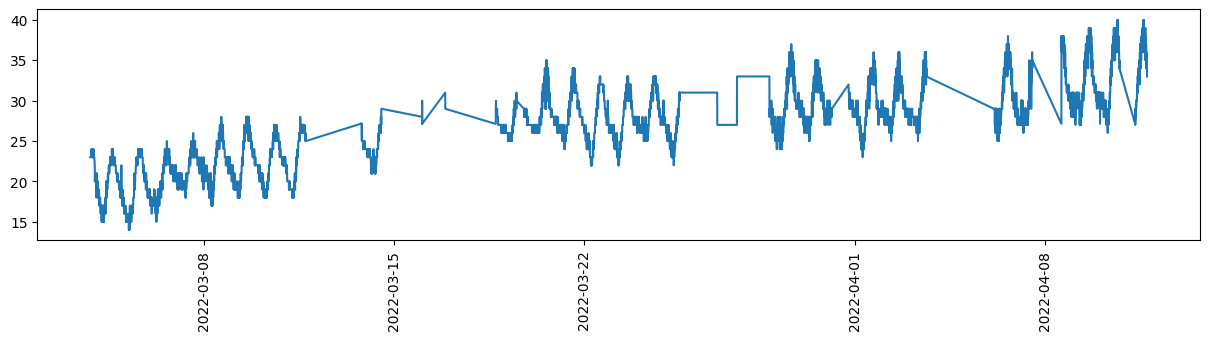

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,3))
plt.plot(df['created_at'],df['temp'])
plt.xticks(rotation = 90)
plt.show()

In [11]:
df

,created_at,temp,hum
0,2022-03-03 19:30:44,23.0,66.0
1,2022-03-03 19:31:44,23.0,66.0
2,2022-03-03 19:32:44,23.0,66.0
3,2022-03-03 19:33:44,23.0,66.0
4,2022-03-03 19:34:44,23.0,66.0
...,...,...,...
38790,2022-04-11 17:55:56,34.0,31.0
38791,2022-04-11 17:56:56,34.0,31.0
38792,2022-04-11 17:57:56,34.0,29.0
38793,2022-04-11 17:58:56,34.0,29.0


In [12]:
df_temp = df[['created_at','temp']]
df_hum = df[['created_at','hum']]

In [13]:
df_temp

,created_at,temp
0,2022-03-03 19:30:44,23.0
1,2022-03-03 19:31:44,23.0
2,2022-03-03 19:32:44,23.0
3,2022-03-03 19:33:44,23.0
4,2022-03-03 19:34:44,23.0
...,...,...
38790,2022-04-11 17:55:56,34.0
38791,2022-04-11 17:56:56,34.0
38792,2022-04-11 17:57:56,34.0
38793,2022-04-11 17:58:56,34.0


In [14]:
df_hum

,created_at,hum
0,2022-03-03 19:30:44,66.0
1,2022-03-03 19:31:44,66.0
2,2022-03-03 19:32:44,66.0
3,2022-03-03 19:33:44,66.0
4,2022-03-03 19:34:44,66.0
...,...,...
38790,2022-04-11 17:55:56,31.0
38791,2022-04-11 17:56:56,31.0
38792,2022-04-11 17:57:56,29.0
38793,2022-04-11 17:58:56,29.0


In [15]:
df_temp = df_temp.rename(columns={'created_at':'ds','temp':'y'})
df_hum = df_hum.rename(columns={'created_at':'ds','hum':'y'})

c:\Users\yennu\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:21:34 - cmdstanpy - INFO - Chain [1] start processing
15:24:07 - cmdstanpy - INFO - Chain [1] done processing


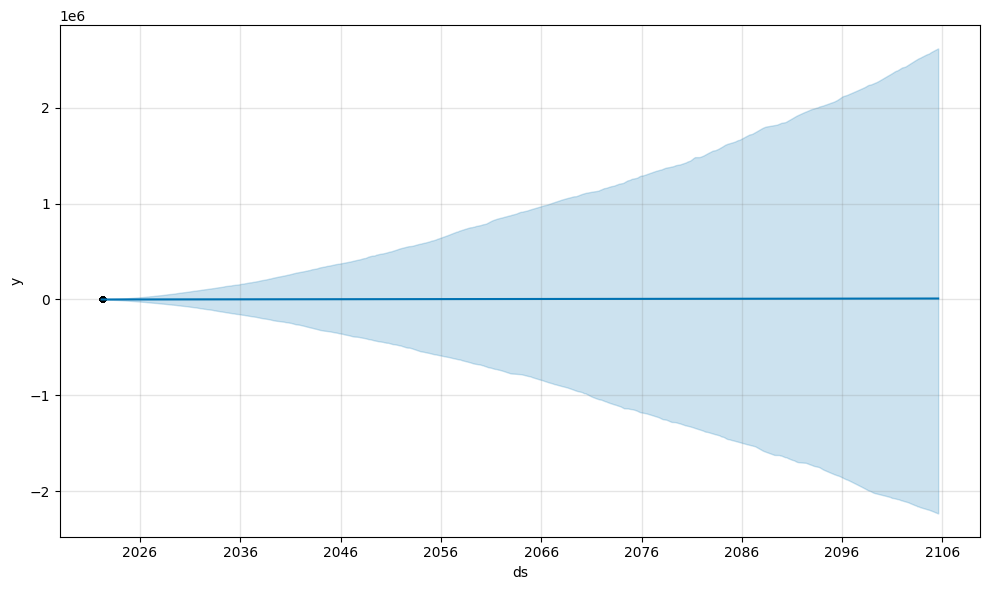

In [16]:
from prophet import Prophet
m = Prophet()
m.fit(df_temp)
future = m.make_future_dataframe(periods=1000,freq='m')
future.tail()
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
fig1 = m.plot(forecast)